# HOUSE PRICING PREDICTION

## Importing Libraries and Dataset

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
df = pd.read_csv("house_cleaned.csv")
print(df.head())
print(df.info())
print(df.describe())

                                      property_name property_type  \
0    5 Bedroom House for sale in Sector 70A Gurgaon         house   
1  5 Bedroom House for sale in Sector 21A Faridabad         house   
2  10 Bedroom House for sale in Sushant Lok Phase 1         house   
3    21 Bedroom House for sale in Sector 54 Gurgaon         house   
4  12 Bedroom House for sale in Sushant Lok Phase 1         house   

            society  price  price_per_sqft    area  \
0  bptp visionnaire   5.25         20115.0  2610.0   
1       independent   5.70        105751.0   539.0   
2       independent   2.10         38251.0   549.0   
3       independent   5.00         43066.0  1161.0   
4       independent   3.00         53763.0   558.0   

                  areaWithType  bedRoom  bathroom balcony  \
0  Plot area 290(242.48 sq.m.)        5         4      3+   
1   Plot area 539(50.07 sq.m.)        5         4       2   
2       Plot area 61(51 sq.m.)       10        10      3+   
3  Plot area 129

## Dropping Unnecessary Columns

In [53]:
drop_cols = ["property_name", "areaWithType", "address", "description", 
             "nearbyLocations", "furnishDetails", "features", "rating"]
df = df.drop(columns=drop_cols)

In [55]:
df = df.dropna(subset=['price'])

In [57]:
X = df.drop(columns=['price'])
y = df['price']

## Preprocessing Data

In [60]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [62]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('scaler', StandardScaler())])

cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy="most_frequent")),('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([('num', num_pipeline, num_features),('cat', cat_pipeline, cat_features)])

## Splitting Dataset

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Model, making Predictions and Evaluating the model

In [68]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_transformed, y_train)

y_pred = regressor.predict(X_test_transformed)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 0.39
RMSE: 0.96
R² Score: 0.94


In [71]:
user_input = pd.DataFrame([{
    "bhk": 3,
    "bathroom": 2,
    "area": 1500,
    "property_type": "Apartment",
    "society": "Greenwood Residency",
    "facing": "East",
    "floor": 5,
    "total_floor": 10,
    "car_parking": 1,
    "age_of_property": 5,
    "latitude": 12.9716,
    "longitude": 77.5946
}])

expected_columns = X_train.columns

for col in expected_columns:
    if col not in user_input.columns:
        user_input[col] = np.nan

user_input = user_input[expected_columns]

user_input_transformed = preprocessor.transform(user_input)

predicted_price = regressor.predict(user_input_transformed)

predicted_price = predicted_price * 10000000

print(f"\nEstimated House Price (in Cr): ₹{predicted_price[0]:,.2f}")


Estimated House Price (in Cr): ₹29,234,000.00


## Visualizing actual vs predicted prices

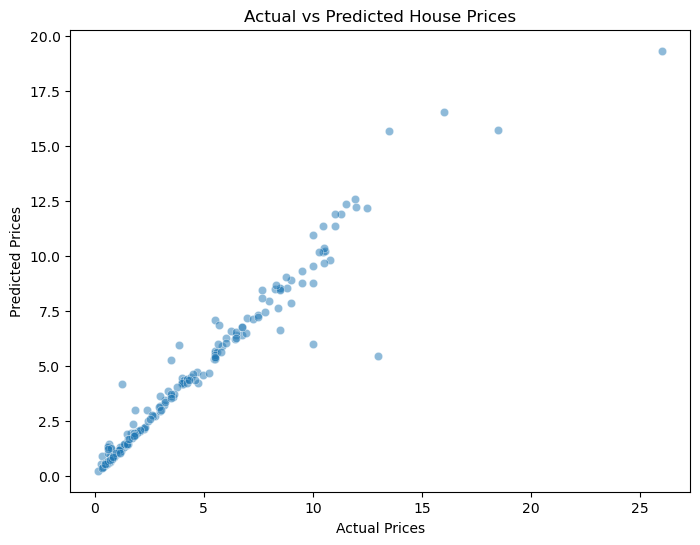

In [70]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

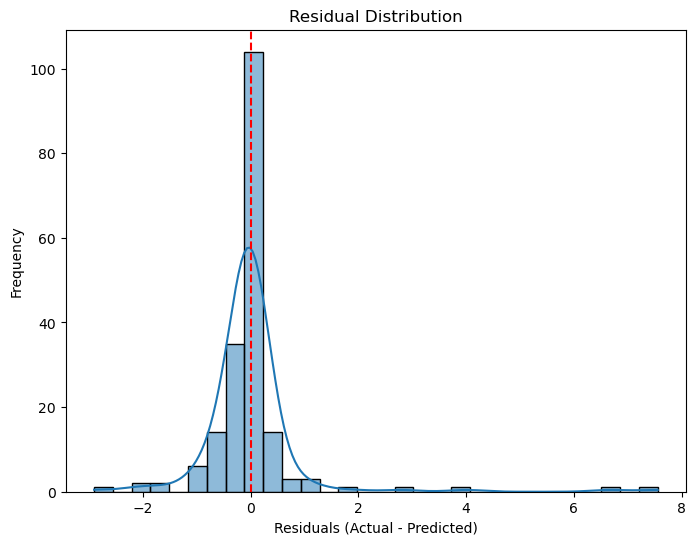

In [72]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

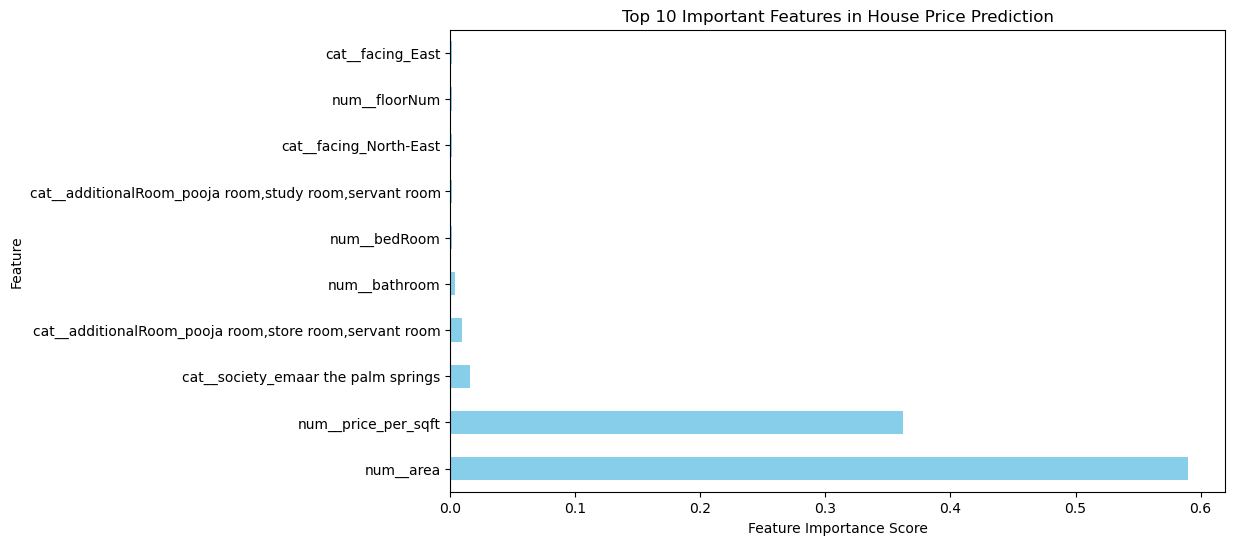

In [78]:
feature_names = preprocessor.get_feature_names_out()

feature_importances = pd.Series(regressor.feature_importances_, index=feature_names)

plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Important Features in House Price Prediction")
plt.show()